In [ ]:
# Overlay the F1s of vae-inpt on decoded - DEMO
# 2022-11-15 Tuesday, MAD across cohorts, norm within cohorts, self-decode overlay plot
# Plot series version 17

# from d_org-dcd.ipynb - 25 cohorts on x axis ( this self-decode version should have 25, so primarily use this
# and train_on_one.ipynb - 24 cohorts on x axis

# Want a seperate notebook for SELF, TRAIN-ON-ONE, etc..

In [1]:
%whos

Interactive namespace is empty.


In [2]:
import pandas as pd
import glob as glob

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statistics import mean
from statistics import stdev

In [ ]:
# Fix sort by cohort order in write-out from self e_

In [20]:
vae_inp.sort_index(inplace = True)

In [26]:
from matplotlib import rc # for color single word in title

vae-inp done


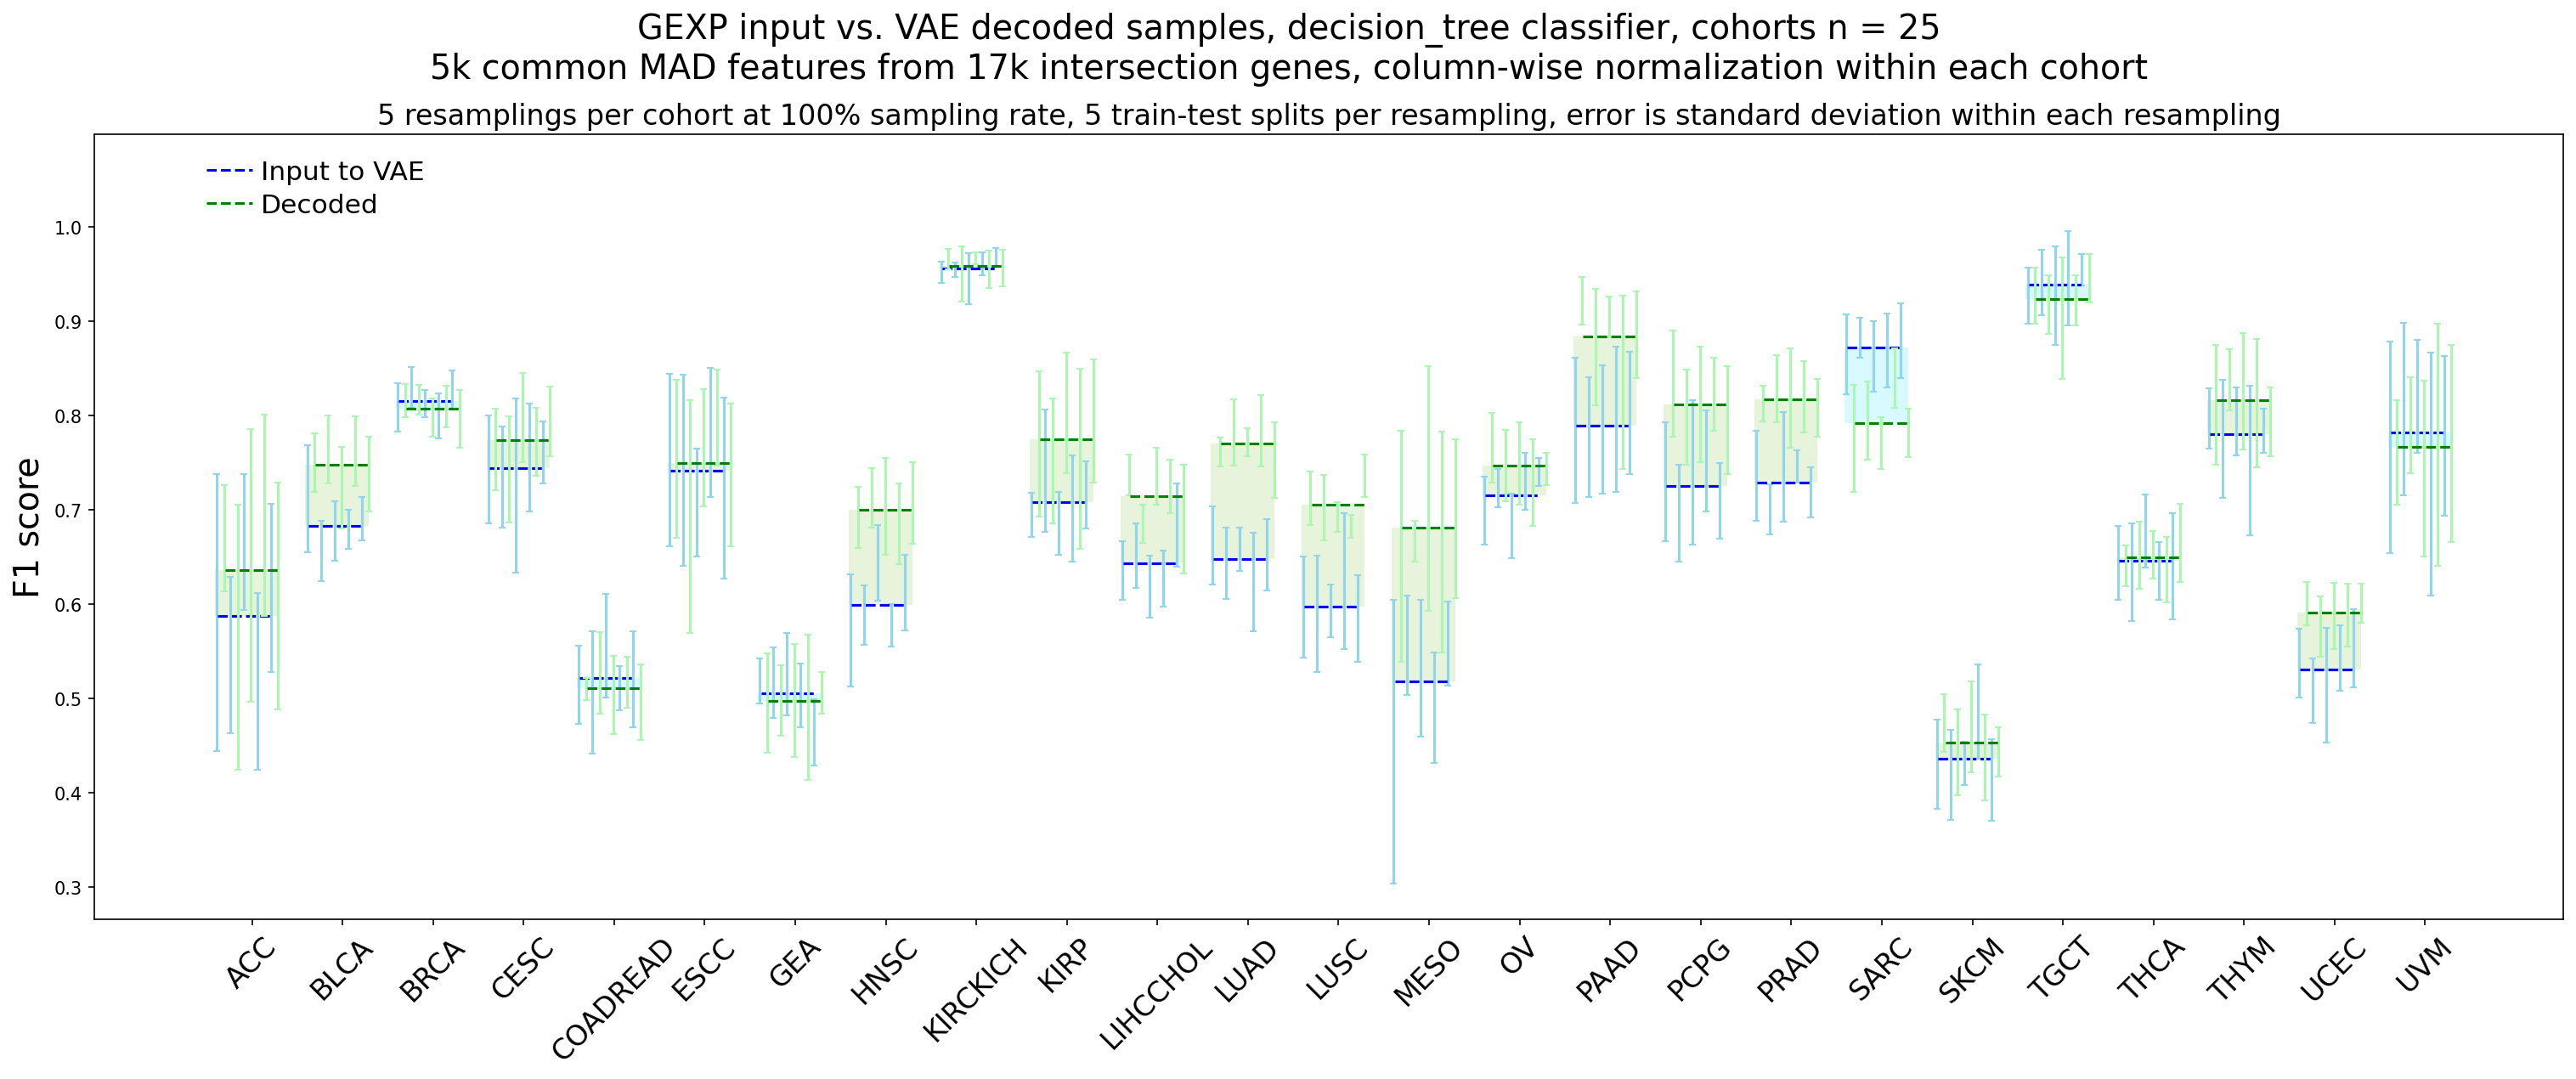

In [3]:
# VAE input and decoded overlay plot, v17

# clf_name = 'random_forest'
# dec_n = pd.read_csv('self_F1s/RF_self-decoded_F1s.tsv', sep = '\t', index_col = 0)

clf_name = 'decision_tree'
vae_inp = pd.read_csv('input-to-VAE_F1s/DT_input-to-vae_F1s.tsv', sep = '\t', index_col = 0)
vae_inp.sort_index(inplace = True)
dec_n = pd.read_csv('self_F1s/DT_self-decoded_F1s.tsv', sep = '\t', index_col = 0)

plt_v = 17

re_samp = 5
trn_tst_splts = 5

figure(figsize=(len(vae_inp.index), 8), dpi=150)

x_tck_lst = []
cohort_list = []

# VAE input section, inp
vae_inp_ave_means = []
for idx_pos, idx in enumerate(vae_inp.index):

    x = idx_pos-.04
    vae_inp_ave_mean = [] # for raw, need for deco
    for rs in list(range(0, re_samp)): # use to step through the columns

        adder = .15
        x = x+adder
        plt.errorbar(
            x,
            vae_inp.loc[idx, 'mean'+str(rs)],
            yerr=vae_inp.loc[idx, 'std'+str(rs)], capsize = 2,
            color = '#90D5EC')
        vae_inp_ave_mean.append(vae_inp.loc[idx, 'mean'+str(rs)])
    vae_inp_ave_means.append(mean(vae_inp_ave_mean))
    x_points = [x-.5-.09, x]
    y_points = [mean(vae_inp_ave_mean), mean(vae_inp_ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'blue') # blue is raw
# end orig gexp
    
    x_tck_lst.append(idx_pos+.5) # only need once, send to end
    cohort_list.append(idx.split('_')[0]) # only need once, send to end
print('vae-inp done')


for idx_pos, idx in enumerate(dec_n.index): # decoded is green

    x = idx_pos+.04
    dec_n_ave_mean = []
    for rs in list(range(0, re_samp)): # use to step through the columns

        adder = .15
        x = x+adder
        plt.errorbar(
            x,
            dec_n.loc[idx, 'mean'+str(rs)],
            yerr=dec_n.loc[idx, 'std'+str(rs)], capsize = 2,
            color = '#abf7b1')
        dec_n_ave_mean.append(dec_n.loc[idx, 'mean'+str(rs)])
        
    x_points = [x-.5-.09, x]
    y_points = [mean(dec_n_ave_mean), mean(dec_n_ave_mean)]
    plt.plot(x_points, y_points, linestyle='dashed', color = 'green') # decoded
    
    if vae_inp_ave_means[idx_pos] > mean(dec_n_ave_mean):
        plt.bar(x, height = vae_inp_ave_means[idx_pos]-mean(dec_n_ave_mean),
                width = -.7,
                bottom = mean(dec_n_ave_mean),
                align = 'edge', color = '#d8f9ff')
        

    if vae_inp_ave_means[idx_pos] < mean(dec_n_ave_mean):
        plt.bar(x, height = vae_inp_ave_means[idx_pos]-mean(dec_n_ave_mean),
                width = -.7,
                bottom = mean(dec_n_ave_mean),
                align = 'edge', color = '#e8f3db')
    # break
plt.xticks(x_tck_lst, labels = cohort_list, rotation = 45, fontsize = 16) 
plt.suptitle(
    'GEXP input vs. VAE decoded samples, '+clf_name
    +' classifier, cohorts n = 25\n'+
    '5k common MAD features from 17k intersection genes, column-wise normalization within each cohort',
    fontsize = 19, y= 1.0)
plt.title('5 resamplings per cohort at 100% sampling rate, 5'+
          ' train-test splits per resampling, error is standard deviation within each resampling',
         fontsize = 16)
plt.ylabel('F1 score', fontsize = 19)
legend_x, legend_y = -.0, 1.06
y_off = .035

plt.plot((legend_x, legend_x+.5), (legend_y, legend_y),
         linestyle='dashed', color = 'blue') # original
plt.plot((legend_x, legend_x+.5), (legend_y-y_off, legend_y-y_off),
         linestyle='dashed', color = 'green') # decoded

center = .010
plt.annotate('Input to VAE', (legend_x+.6,legend_y-center), fontsize = 15)          # blue
plt.annotate('Decoded', (legend_x+.6, legend_y-y_off-center), fontsize = 15) # green

plt.savefig('self-decoded_overlays/self-decoded_overlay_'+
            clf_name+
            str(plt_v)+'.png', dpi = 150,
               bbox_inches = 'tight')